# LEAD SCORING CASE STUDY
<br>

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#supressing warnings

import warnings
warnings.filterwarnings('ignore')

## 1. Importing and Understanding the Data
<br>

In [2]:
#importing and reading the some sample records of the given CSV file

leads_data = pd.read_csv('Leads.csv')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#inspecting the information about the dataset 

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
#checking the number of rows and columns in the dataset

leads_data.shape

(9240, 37)

We can see that have 9240 rows and 37 columns.

In [5]:
#checking the summary of all the numeric columns in the dataset

leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#checking for unique values

leads_data.nunique().sort_values(ascending= False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
Lead Quality                

From above we can say that Prospect ID and Lead Number are two numbers that indiactes the unique number of the person contacted hence these two columns can be dropped.

## 2. EXPLORATORY DATA ANALYSIS

### 2.1 Data Cleaning and Missing Value Treatment
<br>

In [7]:
#dropping the Prospect ID and Lead Number columns as both are all unique

leads_data.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [8]:
#converting 'Select' to NaN (Since 'Select' simply means that no option is selected)

leads_data = leads_data.replace('Select', np.nan)

In [9]:
#checking the null values present in the dataset

leads_data.isnull().sum().sort_values(ascending= False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Co

In [10]:
#checking the percentage of missing values in the dataset

round(((leads_data.isnull().sum()/len(leads_data.index))*100),2).sort_values(ascending= False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

In [11]:
#dropping columns that have more than 45% missing values

cols = leads_data.columns

for col in cols:
    if (((leads_data[col].isnull().sum()/len(leads_data.index))*100) >=45):
        leads_data.drop(col, axis = 1, inplace = True)

In [12]:
#checking the missing value percentage

round(((leads_data.isnull().sum()/len(leads_data.index))*100),2).sort_values(ascending= False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

###### Missing Value Treatment - "City" column
<br>

In [13]:
#checking value counts of 'City' column

leads_data['City'].value_counts(dropna= False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We can impute the missing values for the 'City' column with the Mode Value i.e., 'Mumbai'.

In [14]:
#imputing the missing values with Mode in 'City' column 

leads_data['City'].fillna(leads_data['City'].mode()[0], inplace= True)

###### Missing Value Treatment - "Specialization" column
<br>

In [15]:
#checking value counts of 'Specialization' column

leads_data['Specialization'].value_counts(dropna= False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Leads may not have mentioned their Specialization because either their Specialization was not in the list or they are students and have not yet decicded any Specialization. Here we will impute the missing value by 'Not Specified'.

In [16]:
#imputing the missing value by 'Not Specified'

leads_data['Specialization'].fillna('Not Specified', inplace= True)

###### Missing Value Treatment - "Tags" column
<br>

In [17]:
#checking value counts of 'Specialization' column

leads_data['Tags'].value_counts(dropna= False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Here also we shall replace the missing values by 'Not Specified'.

In [18]:
#imputing the missing value by 'Not Specified'

leads_data['Tags'].fillna('Not Specified', inplace= True)

In [19]:
#replacing tags with low frequency to "Other Tags"

leads_data['Tags'] = leads_data['Tags'].replace(['In confusion whether part time or DLP', 
                                                 'in touch with EINS','Diploma holder (Not Eligible)','Approached upfront',
                                                 'Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                                 'Lost to Others','Shall take in the next coming month','Lateral student',
                                                 'Interested in Next batch','Recognition issue (DEC approval)',
                                                 'Want to take admission but has financial problems',
                                                 'University not recognized'], 'Other_Tags')

leads_data['Tags'] = leads_data['Tags'].replace(['switched off','Already a student','Not doing further education',
                                                 'invalid number','wrong number given',
                                                 'Interested  in full time MBA'] , 'Other_Tags')

###### Missing Value Treatment - "What matters most to you in choosing a course" column
<br>

In [20]:
#checking value counts of 'What matters most to you in choosing a course' column

leads_data['What matters most to you in choosing a course'].value_counts(dropna= False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We can impute the missing values in the above column with mode value i.e., 'Better Career Prospects'.

In [21]:
#imputing the missing values with Mode in 'What matters most to you in choosing a course' column 

leads_data['What matters most to you in choosing a course'].fillna(leads_data['What matters most to you in choosing a course']
                                                                   .mode()[0], inplace= True)

After imputing the missing value in above column we can see that 99.9% leads are looking for Better Carrer Prospects after choosing the course. Hence this column is not going to help us and can be dropped.

In [22]:
cols_to_drop = ['What matters most to you in choosing a course']

###### Missing Value Treatment - "What is your current occupation" column
<br>

In [23]:
#checking value counts of 'What is your current occupation' column

leads_data['What is your current occupation'].value_counts(dropna= False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Imputing the missing value in the above column with Mode value i.e., 'Unemployed'.

In [24]:
#imputing the missing values with Mode in 'What is your current occupation' column 

leads_data['What is your current occupation'].fillna(leads_data['What is your current occupation'].mode()[0], inplace= True)

###### Missing Value Treatment - "Country" column
<br>

In [25]:
#checking value counts of 'Country' column

leads_data['Country'].value_counts(dropna= False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

Imputing the missing values in the above column with Mode Value i.e., 'India'.

In [26]:
#imputing the missing values with Mode in 'Country' column 

leads_data['Country'].fillna(leads_data['Country'].mode()[0], inplace= True)

After imputing the missing value in above column we can see that 97% leads are from India. Hence this column is not going to help us and can be dropped.

In [27]:
#adding the 'Country' column to cols_to_drop list

cols_to_drop.append('Country')

cols_to_drop

['What matters most to you in choosing a course', 'Country']

###### Missing Value Treatment - "Lead Source" column
<br>

In [28]:
#checking value counts of 'Lead Source' column

leads_data['Lead Source'].value_counts(dropna= False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Imputing the missing values in the 'Lead Source' column with 'Others'.

In [29]:
#imputing the missing value in 'Lead Source' with 'Others'

leads_data['Lead Source'].fillna('Others', inplace = True)

#changing names and combining low frquency data 

leads_data['Lead Source'] = leads_data['Lead Source'].replace('google', 'Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace('Facebook', 'Social Media')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel',
                                                               'welearnblog_Home','WeLearn','blog','Pay per Click Ads',
                                                               'testone','NC_EDM'] ,'Others')

###### Missing Value Treatment - "Last Activity" column
<br>

In [30]:
#checking value counts of 'Last Activity' column

leads_data['Last Activity'].value_counts(dropna= False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Imputing the missing values in the 'Last Activity' column with 'Others'.

In [31]:
#imputing the missing value in 'Last Activity' with 'Others'

leads_data['Last Activity'].fillna('Others', inplace = True)

#changing names and combining low frquency data 

leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 
                                                                   'Approached upfront','View in browser link Clicked',
                                                                   'Email Marked Spam','Email Received',
                                                                   'Resubscribed to emails',
                                                                   'Visited Booth in Tradeshow'], 'Others')

In [32]:
#checking the percentage of missing values in the dataset

round(((leads_data.isnull().sum()/len(leads_data.index))*100),2).sort_values(ascending= False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Lead Origin                                      0.00
Newspaper Article                                0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
City                                             0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Tags                                             0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
Magazine                                         0.00
Lead Source                                      0.00
Search                                           0.00
What matters most to you in 

Since the percentage of Missing Value is very little (below 2%), we can drop the rows that have missing values, it will not affect the model. 

In [33]:
#dropping the missing values

leads_data.dropna(inplace= True)

In [34]:
#checking the percentage of missing values in the dataset

round(((leads_data.isnull().sum()/len(leads_data.index))*100),2).sort_values(ascending= False)

Lead Origin                                      0.0
Lead Source                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

We don't have any missing value in the dataset. 

### 2.2 Outliers Treatment
<br>

In [35]:
leads_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


We can see that outliers are definately present in 'TotalVisits', 'Total Time Spent on Website' and 'Page Views Per Visit' columns. 

Let's check it.

###### Outlier Treatment - "TotalVisits" column
<br>

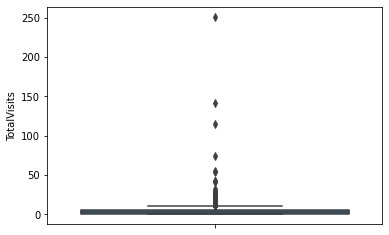

In [36]:
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_data['TotalVisits'])
plt.show()

We can see outliers are present here. 

In [37]:
#checking percentile values for "TotalVisits" column

leads_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

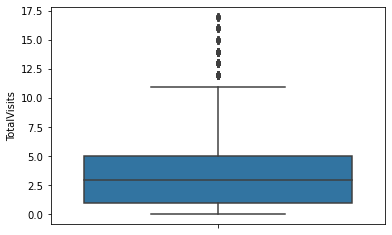

In [38]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads_data.TotalVisits.quantile(0.99)
leads_data = leads_data[(leads_data.TotalVisits <= Q3)]
Q1 = leads_data.TotalVisits.quantile(0.01)
leads_data = leads_data[(leads_data.TotalVisits >= Q1)]
sns.boxplot(y=leads_data['TotalVisits'])
plt.show()

###### Outlier Treatment - "Total Time Spent on Website" column
<br>

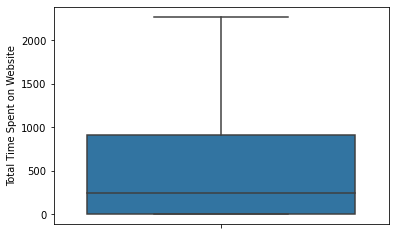

In [39]:
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_data['Total Time Spent on Website'])
plt.show()

In [40]:
#checking percentile values for "Total Time Spent on Website"

leads_data['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

We can see no major outlier present in 'Total Time Spent on Website' column so we do not do any outlier treatment here.

###### Outlier Treatment - "Page Views Per Visit" column
<br>

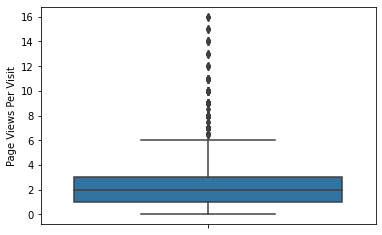

In [41]:
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_data['Page Views Per Visit'])
plt.show()

In [42]:
#checking percentile values for "Total Visits"

leads_data['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

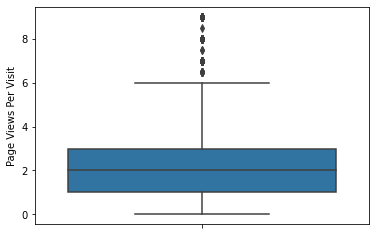

In [43]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads_data['Page Views Per Visit'].quantile(0.99)
leads_data = leads_data[leads_data['Page Views Per Visit'] <= Q3]
Q1 = leads_data['Page Views Per Visit'].quantile(0.01)
leads_data = leads_data[leads_data['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads_data['Page Views Per Visit'])
plt.show()

In [44]:
#now checking the shape of the dataset after outlier treatment

leads_data.shape

(8953, 28)

### 2.3 Checking other variables of the dataset
<br>

In [45]:
#checking value counts for 'Do Not Call' column

leads_data['Do Not Call'].value_counts(normalize = True)

No     0.999777
Yes    0.000223
Name: Do Not Call, dtype: float64

We can add 'Do Not Call' to drop column list as we can see that more than 99% of the values are No.

In [46]:
#adding the 'Do Not Call' column to cols_to_drop list

cols_to_drop.append('Do Not Call')

cols_to_drop

['What matters most to you in choosing a course', 'Country', 'Do Not Call']

In [47]:
#checking value counts for 'Do Not Email' column

leads_data['Do Not Email'].value_counts(normalize = True)

No     0.922149
Yes    0.077851
Name: Do Not Email, dtype: float64

This column can help in our analysis so we will keep this for now.

In [48]:
#checking value counts for 'Search' column

leads_data['Search'].value_counts(normalize = True)

No     0.998548
Yes    0.001452
Name: Search, dtype: float64

We can add 'Search' to drop column list as we can see that more than 99% of the values are No.

In [49]:
#adding the 'Search' column to cols_to_drop list

cols_to_drop.append('Search')

cols_to_drop

['What matters most to you in choosing a course',
 'Country',
 'Do Not Call',
 'Search']

In [50]:
#checking value counts for 'Magazine' column

leads_data['Magazine'].value_counts(normalize = True)

No    1.0
Name: Magazine, dtype: float64

We can add 'Magazine' to drop column list as we can see that all the values are No.

In [51]:
#adding the 'Magazine' column to cols_to_drop list

cols_to_drop.append('Magazine')

cols_to_drop

['What matters most to you in choosing a course',
 'Country',
 'Do Not Call',
 'Search',
 'Magazine']

In [52]:
#checking value counts for 'Newspaper Article' column

leads_data['Newspaper Article'].value_counts(normalize = True)

No     0.999888
Yes    0.000112
Name: Newspaper Article, dtype: float64

We can add 'Newspaper Article' to drop column list as we can see that more than 99% of the values are No.

In [53]:
#adding the 'Newspaper Article' column to cols_to_drop list

cols_to_drop.append('Newspaper Article')

cols_to_drop

['What matters most to you in choosing a course',
 'Country',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article']

In [54]:
#checking value counts for 'X Education Forums' column

leads_data['X Education Forums'].value_counts(normalize = True)

No    1.0
Name: X Education Forums, dtype: float64

We can add 'X Education Forums' to drop column list as we can see that all the values are No.

In [55]:
#adding the 'X Education Forums' column to cols_to_drop list

cols_to_drop.append('X Education Forums')

cols_to_drop

['What matters most to you in choosing a course',
 'Country',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums']

In [56]:
#checking value counts for 'Newspaper' column

leads_data['Newspaper'].value_counts(normalize = True)

No     0.999888
Yes    0.000112
Name: Newspaper, dtype: float64

We can add 'Newspaper' to drop column list as we can see that more than 99% of the values are No.

In [57]:
#adding the 'Newspaper' column to cols_to_drop list

cols_to_drop.append('Newspaper')

cols_to_drop

['What matters most to you in choosing a course',
 'Country',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper']

In [58]:
#checking value counts for 'Digital Advertisement' column

leads_data['Digital Advertisement'].value_counts(normalize = True)

No     0.999665
Yes    0.000335
Name: Digital Advertisement, dtype: float64

We can add 'Digital Advertisement' to drop column list as we can see that more than 99% of the values are No.

In [59]:
#adding the 'Digital Advertisement' column to cols_to_drop list

cols_to_drop.append('Digital Advertisement')

cols_to_drop

['What matters most to you in choosing a course',
 'Country',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement']

In [60]:
#checking value counts for 'Through Recommendations' column

leads_data['Through Recommendations'].value_counts(normalize = True)

No     0.99933
Yes    0.00067
Name: Through Recommendations, dtype: float64

We can add 'Through Recommendations' to drop column list as we can see that more than 99% of the values are No.

In [61]:
#adding the 'Through Recommendations' column to cols_to_drop list

cols_to_drop.append('Through Recommendations')

cols_to_drop

['What matters most to you in choosing a course',
 'Country',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [62]:
#checking value counts for 'Receive More Updates About Our Courses' column

leads_data['Receive More Updates About Our Courses'].value_counts(normalize = True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

We can add 'Receive More Updates About Our Courses' to drop column list as we can see that all the values are No.

In [63]:
#adding the 'Receive More Updates About Our Courses' column to cols_to_drop list

cols_to_drop.append('Receive More Updates About Our Courses')

cols_to_drop

['What matters most to you in choosing a course',
 'Country',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses']

In [64]:
#checking value counts for 'Update me on Supply Chain Content' column

leads_data['Update me on Supply Chain Content'].value_counts(normalize = True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

We can add 'Update me on Supply Chain Content' to drop column list as we can see that all the values are No.

In [65]:
#adding the 'Update me on Supply Chain Content' column to cols_to_drop list

cols_to_drop.append('Update me on Supply Chain Content')

cols_to_drop

['What matters most to you in choosing a course',
 'Country',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content']

In [66]:
#checking value counts for 'Get updates on DM Content' column

leads_data['Get updates on DM Content'].value_counts(normalize = True)

No    1.0
Name: Get updates on DM Content, dtype: float64

We can add 'Get updates on DM Content' to drop column list as we can see that all the values are No.

In [67]:
#adding the 'Get updates on DM Content' column to cols_to_drop list

cols_to_drop.append('Get updates on DM Content')

cols_to_drop

['What matters most to you in choosing a course',
 'Country',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content']

In [68]:
#checking value counts for 'I agree to pay the amount through cheque' column

leads_data['I agree to pay the amount through cheque'].value_counts(normalize = True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

We can add 'I agree to pay the amount through cheque' to drop column list as we can see that all the values are No.

In [69]:
#adding the 'I agree to pay the amount through cheque' column to cols_to_drop list

cols_to_drop.append('I agree to pay the amount through cheque')

cols_to_drop

['What matters most to you in choosing a course',
 'Country',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [70]:
#checking value counts for 'A free copy of Mastering The Interview' column

leads_data['A free copy of Mastering The Interview'].value_counts(normalize = True)

No     0.687479
Yes    0.312521
Name: A free copy of Mastering The Interview, dtype: float64

In [71]:
#checking value counts of 'Last Notable Activity' column

leads_data['Last Notable Activity'].value_counts()

Modified                        3224
Email Opened                    2789
SMS Sent                        2143
Page Visited on Website          288
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      46
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [72]:
#combining the low frequency value

leads_data['Last Notable Activity'] = leads_data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                                   'Email Marked Spam','Unreachable',
                                                                                   'Unsubscribed','Email Bounced',
                                                                                   'Resubscribed to emails',
                                                                                   'View in browser link Clicked',
                                                                                   'Approached upfront', 
                                                                                   'Form Submitted on Website', 
                                                                                   'Email Received'],'Other_Notable_activity')

In [73]:
#list of columns that needs to be dropped

cols_to_drop

['What matters most to you in choosing a course',
 'Country',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [74]:
#dropping the columns

leads_data.drop(cols_to_drop, axis = 1, inplace = True)

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   obje

### 2.4 Univariate Analysis
<br>

In [75]:
#dividing categorical and continuous columns

cat_cols = [col for col in leads_data.columns if leads_data[col].dtype == 'object']

cont_cols = [col for col in leads_data.columns if leads_data[col].dtype in ['int64', 'float64']]

print("categorical columns: ", cat_cols)

print("Continuous columns: ", cont_cols)

categorical columns:  ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']
Continuous columns:  ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


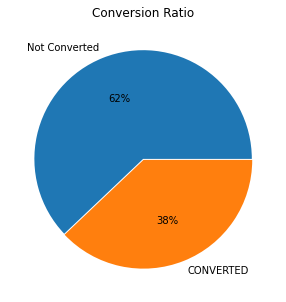

In [76]:
#checking the pconversion ration of the dataset

fig = plt.figure(figsize=(5,5))
plt.pie(leads_data['Converted'].value_counts(normalize=True)*100, autopct = "%1.0f%%", 
        labels=['Not Converted','CONVERTED'], explode=(0,0.01))
plt.title('Conversion Ratio')
plt.show()

Histogram of Converted :


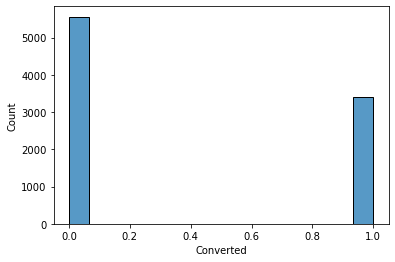

Histogram of TotalVisits :


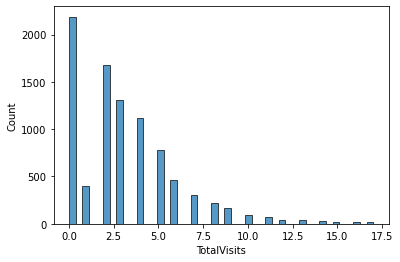

Histogram of Total Time Spent on Website :


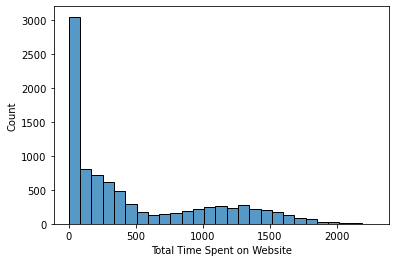

Histogram of Page Views Per Visit :


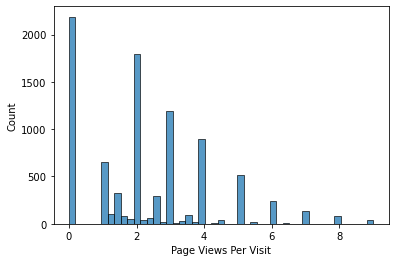

In [77]:
#univariate analysis of continuous columns

for i in cont_cols:
    print('Histogram of',i,':')
    sns.histplot(leads_data[i])
    plt.show()

##### Observation from above plot: 

We can see that most of the leads have :

- only visited once, 
- have spent one min on website
- visited only one page

Count Plot of Lead Origin :


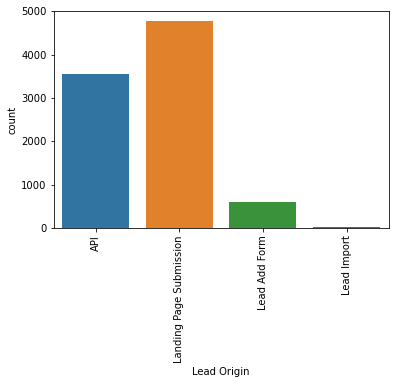

Count Plot of Lead Source :


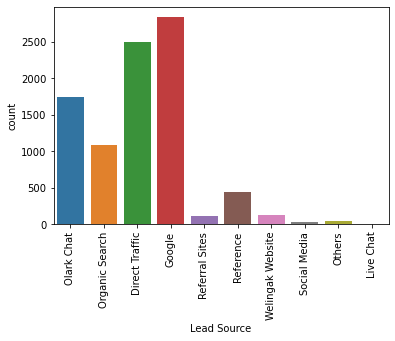

Count Plot of Do Not Email :


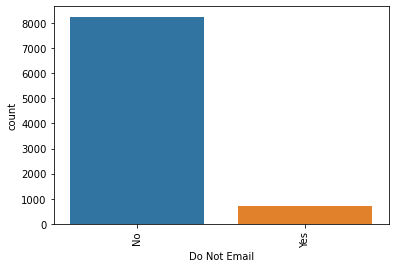

Count Plot of Last Activity :


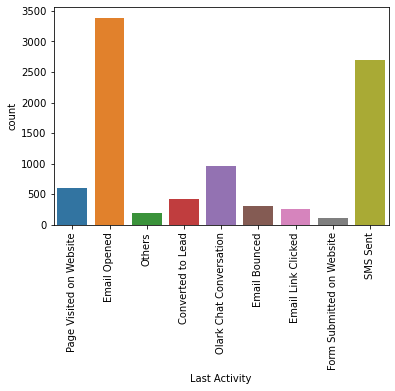

Count Plot of Specialization :


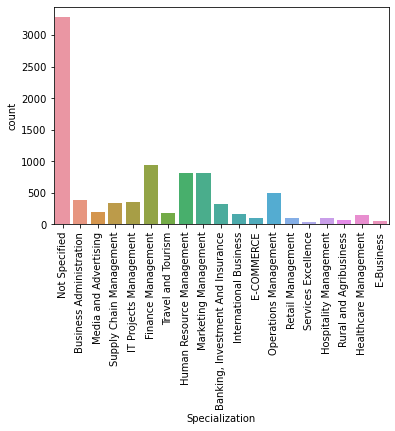

Count Plot of What is your current occupation :


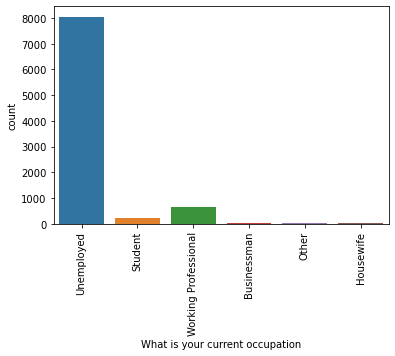

Count Plot of Tags :


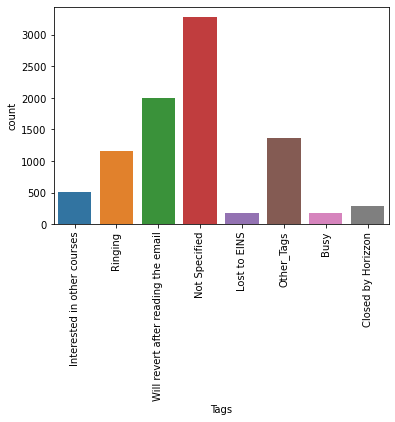

Count Plot of City :


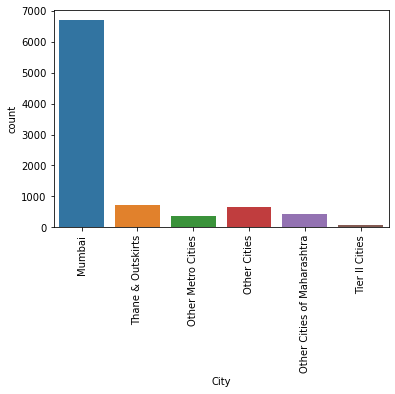

Count Plot of A free copy of Mastering The Interview :


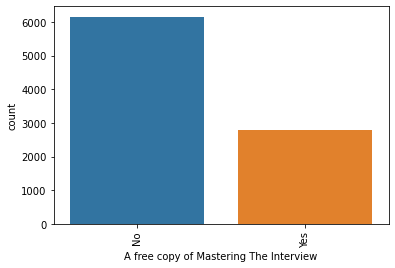

Count Plot of Last Notable Activity :


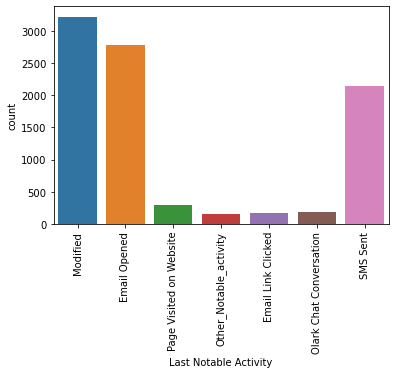

In [78]:
#univariate analysis of categorical columns

for i in cat_cols:
    print('Count Plot of',i,':')
    sns.countplot(leads_data[i])
    plt.xticks(rotation = 90)
    plt.show()

##### Observation from above plot: 

- Most Leads are from Landing Submission Page, and API. 

- Lead are coming Google, Direct Traffic and Olark Chat.

- Most of the leads want to get email about their course hence they have opted No. 

- Lead counts are high for SMS Sent and Email Opened. 

- We can see most of the leads are from Finance, HR and Marketing Management.

- Unemployed and Working Professional have high leads count. 

- Most of the leads are from Mumbai. 

### 2.4 Bivariate Analysis
<br>

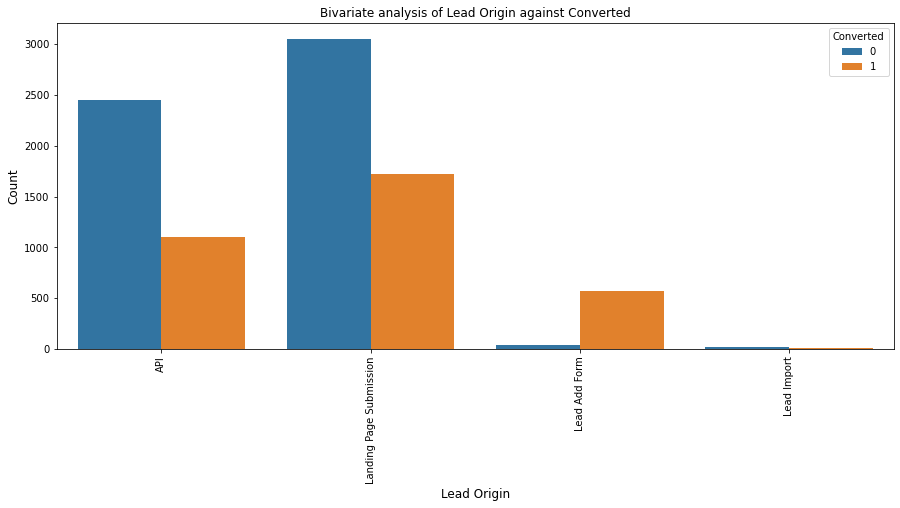

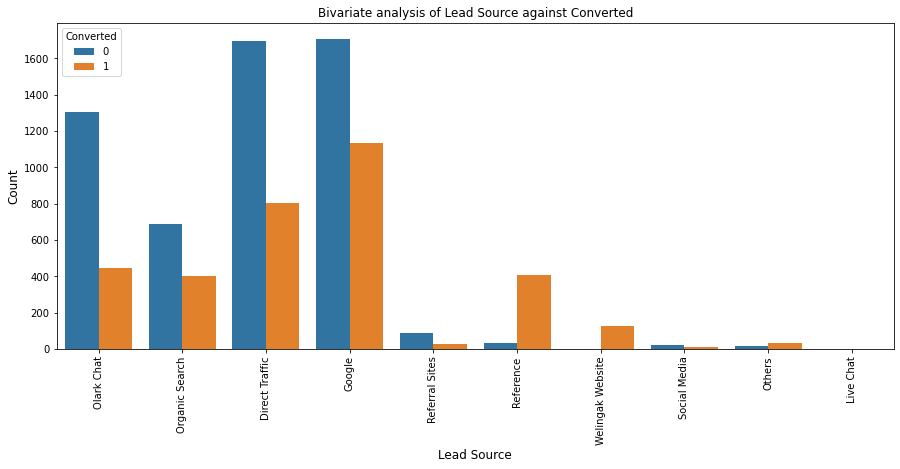

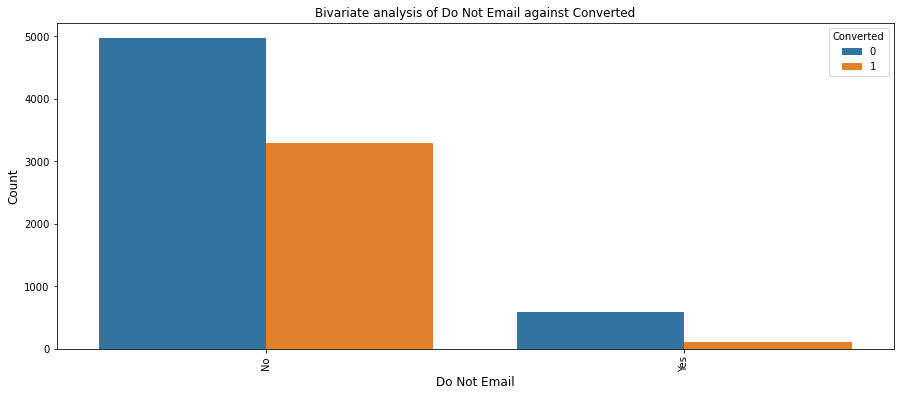

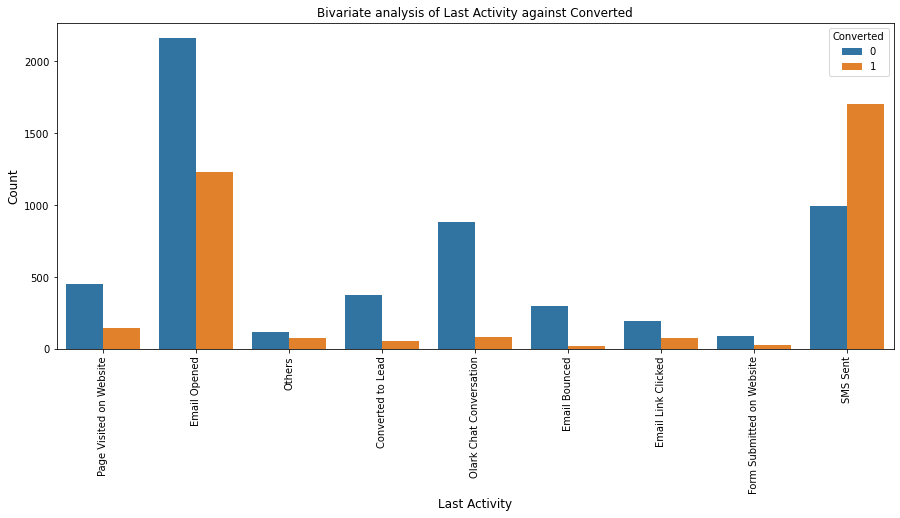

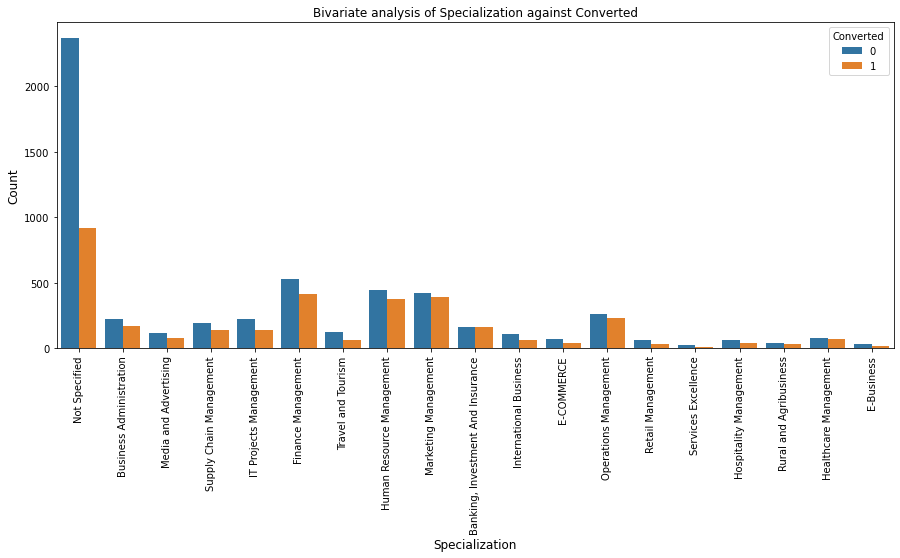

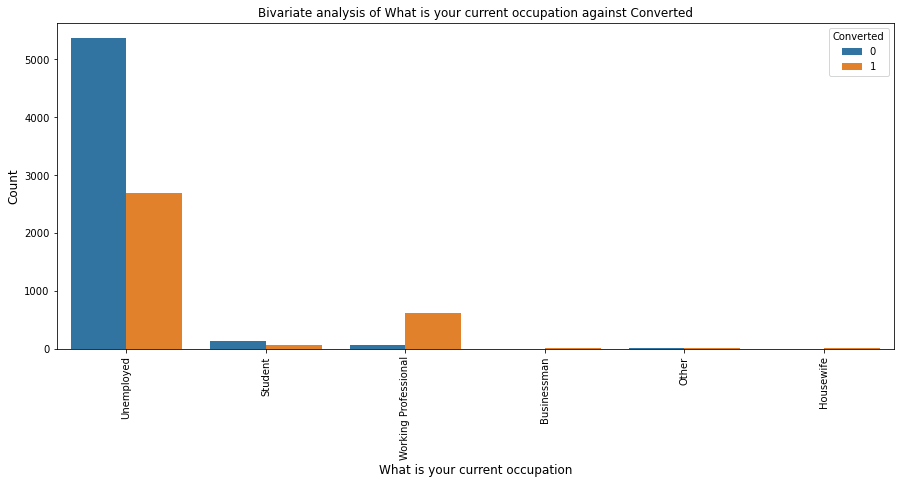

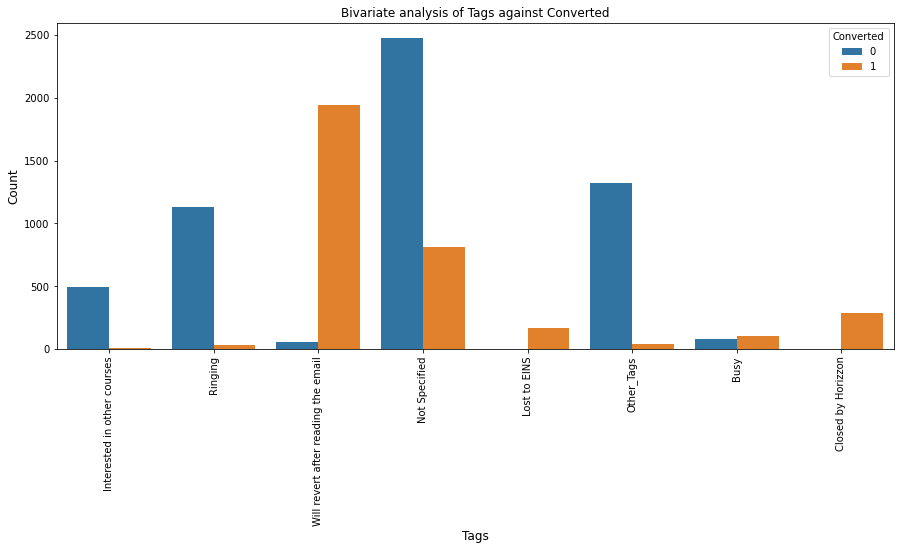

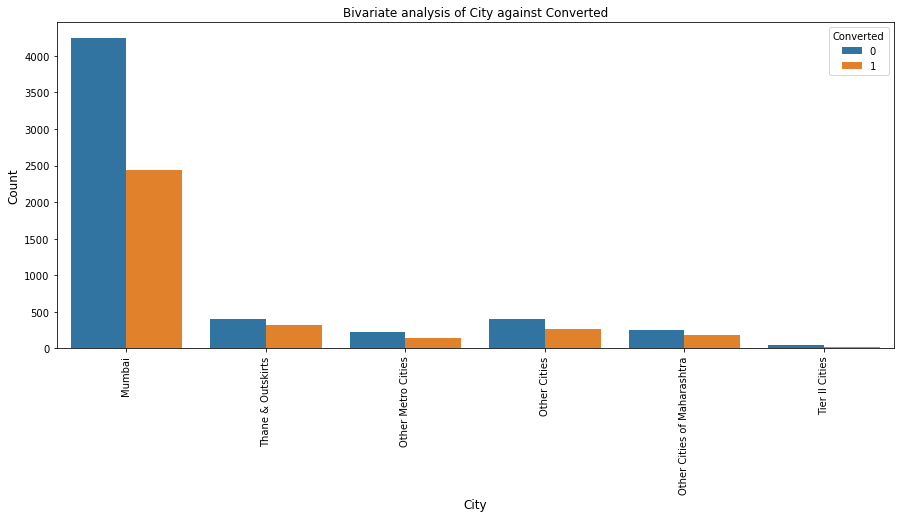

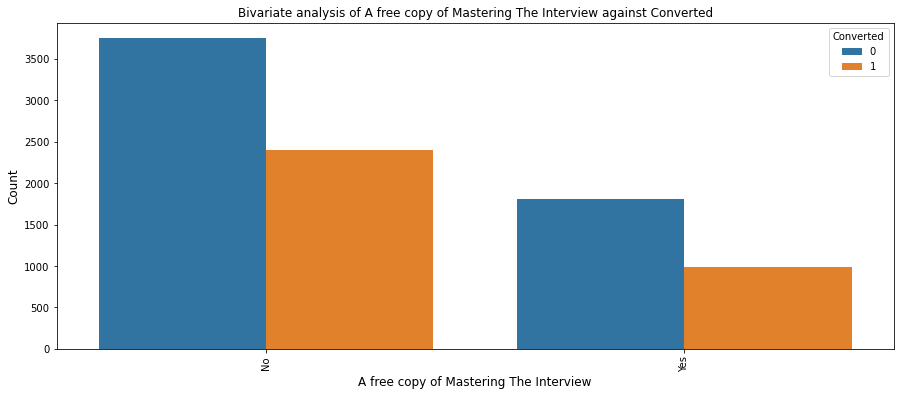

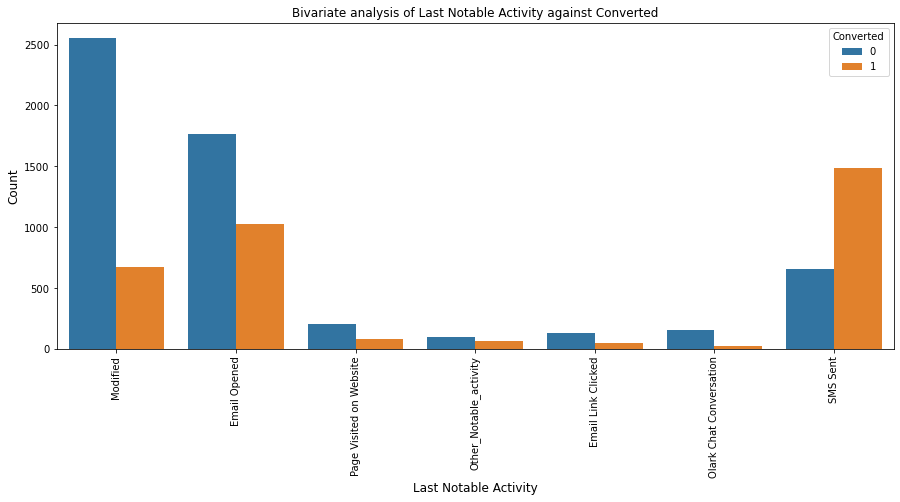

In [79]:
#bivariate analysis of categorical columns against Converted Column

for i in cat_cols:
    plt.figure(figsize=(15,6))
    sns.countplot(leads_data[i], hue=leads_data['Converted'])
    plt.title(f"Bivariate analysis of {i} against Converted", fontsize = 12)
    plt.xlabel(i, fontsize = 12)
    plt.ylabel('Count', fontsize = 12)
    plt.xticks(rotation = 90)
    plt.show()

##### Observation from above plot: 

**Lead Origin :**

- Leads Originting from API and Landing Page Submission are high in number and they also have high conversion.

- Lead Add Form have high conversion ratio but the Lead counts are not very high.

- We have to focus on improving the conversion of leads coming from API & Landing Page Submission and along with that we need to work on improving the lead counts coming from Lead Add Form. 

**Lead Source :**

- Lead Coming from Google and Direct Traffic are high. 

- Leads coming from Reference and Welingak Website have high conversion ratio. 

- We need to focus on improving the lead conversion for the leads coming Olark Chat, Organic Search, Direct Traffic and Google.

**Last Activity:**

- Count for Email Opened is high.

- SMS sent have high conversion ratio.

**Specialization :**

- We can see that the Management Specialization have high number of leads and their conversions are also high.

**Current Occupation :**

- Working Professionals opting for the course have high chance of taking it. 

**Tags :**

- Will revert after reading the email and Closed by Horizzon have high lead conversion ratio.

**City :**

- We can see that maximum leads are from Mumbai. 

**Last Notable Activity :**

- We can see that SMS sent have high conversion ratio. 

- Modified and Email Opened have high lead counts.

In [80]:
#combining Management Specializations together because they show similar trends

leads_data['Specialization'] = leads_data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                                     'Marketing Management','Operations Management',
                                                                     'IT Projects Management','Supply Chain Management',
                                                                     'Healthcare Management','Hospitality Management',
                                                                     'Retail Management'] ,'Management_Specializations')

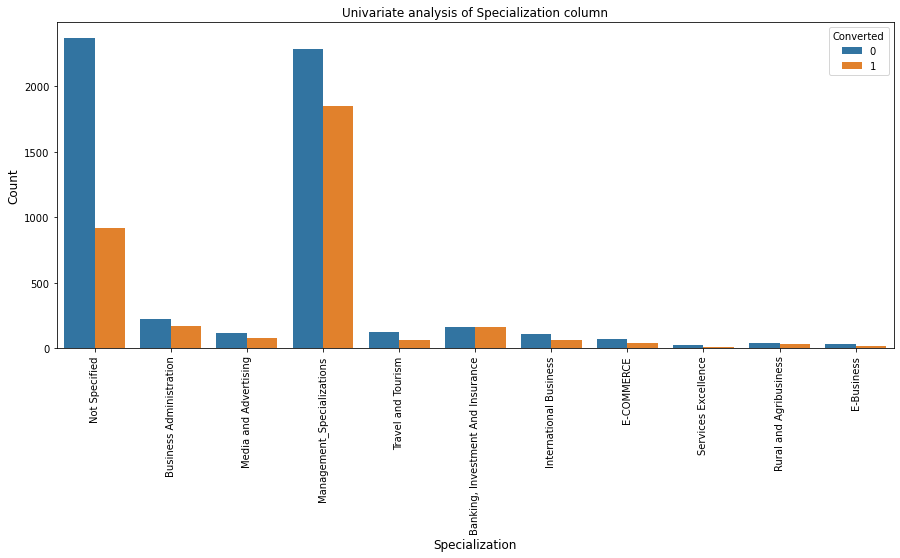

In [81]:
#plotting the graph for verification

plt.figure(figsize=(15,6))
sns.countplot(leads_data['Specialization'], hue=leads_data['Converted'])
plt.title("Univariate analysis of Specialization column", fontsize = 12)
plt.xlabel('Specialization', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

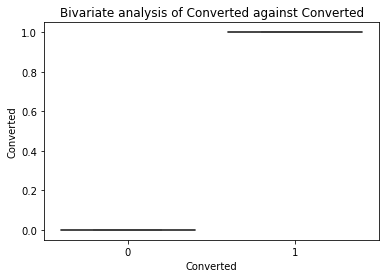

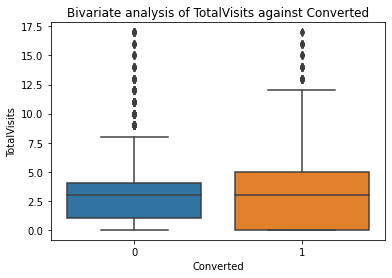

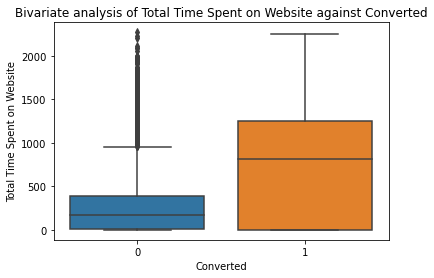

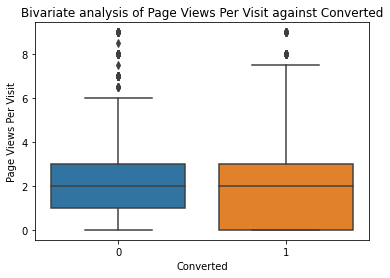

In [82]:
#bivariate analysis of continuous columns

for i in cont_cols:
    sns.boxplot(y = i, x ='Converted', data = leads_data)
    plt.title(f"Bivariate analysis of {i} against Converted", fontsize = 12)
    plt.show()

##### Observation from above plot: 

- Leads spending more time on website have more chance of getting converted. 

- Median of Page Views Per Visit and Total Visits are same so we cannot specifically say something here.  

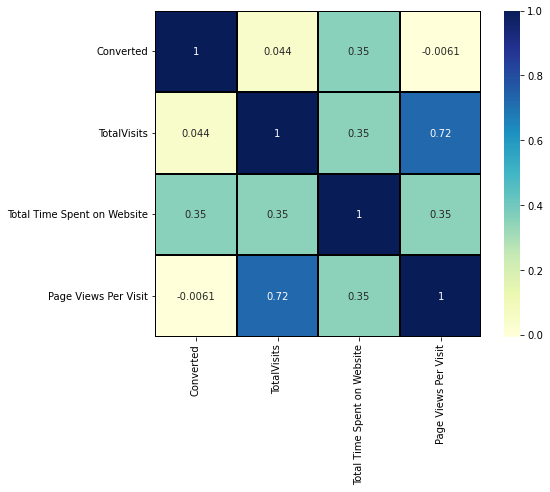

In [83]:
#checking correlations of numeric values

plt.figure(figsize = (8,6))
corr = leads_data.corr()
sns.heatmap(corr, linewidth = 0.01, square = True, annot = True, cmap = 'YlGnBu', linecolor = 'Black')
plt.show()

##### Observation from above plot: 

- A positive correlation can be seen between Converted and Total TIme Spent on Website.

## 3. Creation of Dummy Variables
<br>

In [84]:
#getting the list of categorical columns

print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [85]:
#creating a list of variables to map

var = ['Do Not Email', 'A free copy of Mastering The Interview']

#defining the map function

def binary_map(x):
    return x.map({'Yes' : 0, 'No': 1})

#mapping the variables

leads_data[var] = leads_data[var].apply(binary_map)

In [86]:
#getting the dummy values

dummy = pd.get_dummies(leads_data[['Lead Origin','What is your current occupation','City']], drop_first=True)

leads_data = pd.concat([leads_data,dummy], axis = 1)

In [87]:
dummy = pd.get_dummies(leads_data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], axis = 1)
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [88]:
dummy = pd.get_dummies(leads_data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis = 1)
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [89]:
dummy = pd.get_dummies(leads_data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], axis = 1)
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [90]:
dummy = pd.get_dummies(leads_data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], axis = 1)
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [91]:
dummy = pd.get_dummies(leads_data['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], axis = 1)
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [92]:
#dropping the original categorial columns after dummy variable column

leads_data.drop(columns= ['Lead Origin', 'What is your current occupation','City','Specialization', 'Lead Source', 
                          'Last Activity', 'Last Notable Activity', 'Tags'], axis = 1, inplace = True)

In [93]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8953 non-null   int64  
 1   Converted                                             8953 non-null   int64  
 2   TotalVisits                                           8953 non-null   float64
 3   Total Time Spent on Website                           8953 non-null   int64  
 4   Page Views Per Visit                                  8953 non-null   float64
 5   A free copy of Mastering The Interview                8953 non-null   int64  
 6   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 7   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 8   Lead Origin_Lead Import                               8953

In [94]:
leads_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,1,0,0.0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,5.0,674,2.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,2.0,1532,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1.0,305,1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,2.0,1428,1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 3. Train Test Split
<br>

In [95]:
#x variable

X = leads_data.drop('Converted', axis = 1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,1,0.0,0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1.0,305,1.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
#putting response variable to y 

y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [97]:
#splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, random_state= 100)

## 4. Scaling of Data
<br>

In [98]:
#scaling numeric columns

num_cols = [col for col in X_train if X_train[col].dtype in ['int64','float64']]

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.28572,0.668862,1.848117,1.455819,0.667339,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4696,0.28572,-0.030697,-0.037832,0.399961,0.667339,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3274,0.28572,0.319082,-0.642138,-0.127967,0.667339,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2164,0.28572,-0.380477,-0.154676,-0.127967,0.667339,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1667,0.28572,0.319082,1.258415,-0.481679,0.667339,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 5. Model Building
<br>

In [99]:
#running RFE with output number of variables = 20


log_reg = LogisticRegression()

rfe = RFE(log_reg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [100]:
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
        True, False,  True, False, False, False,  True, False,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True])

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 24),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('What is your current occupation_Housewife', False, 25),
 ('What is your current occupation_Other', False, 29),
 ('What is your current occupation_Student', False, 18),
 ('What is your current occupation_Unemployed', False, 15),
 ('What is your current occupation_Working Professional', False, 3),
 ('City_Other Cities', False, 17),
 ('City_Other Cities of Maharashtra', False, 33),
 ('City_Other Metro Cities', False, 38),
 ('City_Thane & Outskirts', False, 34),
 ('City_Tier II Cities', False, 22),
 ('Specialization_Banking, Investment And Insurance', False, 9),
 ('Specialization_Business Administration', False, 32),
 ('Specialization_E-Business', False, 28),
 ('

In [102]:
#list of RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [103]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Exc

In [104]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1216.3
Date:                Mon, 23 Jan 2023   Deviance:                       2432.5
Time:                        11:26:29   Pearson chi2:                 8.27e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6096
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Dropping 'Lead Origin_Lead Add Form' column as it has very high p-value.

In [105]:
#dropping column 'Lead Source_Referral Sites' as it have high p-value

col = col.drop('Lead Origin_Lead Add Form')

In [106]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1218.5
Date:                Mon, 23 Jan 2023   Deviance:                       2437.0
Time:                        11:26:29   Pearson chi2:                 8.46e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6093
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Dropping 'Last Notable Activity_Olark Chat Conversation' column as it has very high p-value.

In [107]:
#dropping column 'Last Notable Activity_Olark Chat Conversation' as it have high p-value

col = col.drop('Last Notable Activity_Olark Chat Conversation')

In [108]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1221.5
Date:                Mon, 23 Jan 2023   Deviance:                       2443.0
Time:                        11:26:29   Pearson chi2:                 8.48e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6089
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Dropping 'Last Activity_Email Bounced ' column as it has a p-value over the threshold limit.

In [109]:
#dropping column 'Last Activity_Email Bounced' as it has a p-value over the threshold limit.

col = col.drop('Last Activity_Email Bounced')

In [110]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6249
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1225.6
Date:                Mon, 23 Jan 2023   Deviance:                       2451.1
Time:                        11:26:29   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6084
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Checking VIFs

In [111]:
#creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_SMS Sent,6.59
7,Last Activity_SMS Sent,6.43
9,Last Notable Activity_Modified,2.41
2,Lead Source_Google,1.78
1,Lead Source_Direct Traffic,1.75
16,Tags_Will revert after reading the email,1.54
14,Tags_Other_Tags,1.40
6,Last Activity_Olark Chat Conversation,1.38
15,Tags_Ringing,1.35
3,Lead Source_Organic Search,1.31


Dropping 'Last Notable Activity_SMS Sent' column as it is insignificant in presence of other value due to high VIF.

In [112]:
#dropping variable with high VIF

col = col.drop('Last Notable Activity_SMS Sent')

In [113]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6250
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1236.2
Date:                Mon, 23 Jan 2023   Deviance:                       2472.4
Time:                        11:26:30   Pearson chi2:                 8.45e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6071
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [114]:
#creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Notable Activity_Modified,1.90
2,Lead Source_Google,1.77
1,Lead Source_Direct Traffic,1.73
7,Last Activity_SMS Sent,1.53
15,Tags_Will revert after reading the email,1.50
13,Tags_Other_Tags,1.40
14,Tags_Ringing,1.34
6,Last Activity_Olark Chat Conversation,1.32
3,Lead Source_Organic Search,1.31
0,Total Time Spent on Website,1.27


###### All Values seem to be in order. Now, moving on to derive the Probabilities, Lead Score, Predictions on Train Data.
<br>

In [115]:
#getting the Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.295780
4696    0.029941
3274    0.454277
2164    0.001659
1667    0.989765
7024    0.229277
8018    0.087693
778     0.147285
6942    0.002224
4440    0.079125
dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29577992, 0.02994132, 0.45427677, 0.00165898, 0.98976472,
       0.22927652, 0.08769333, 0.14728547, 0.00222364, 0.07912493])

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.295780,9196
1,0,0.029941,4696
2,0,0.454277,3274
3,0,0.001659,2164
4,1,0.989765,1667


In [118]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.295780,9196,0
1,0,0.029941,4696,0
2,0,0.454277,3274,0
3,0,0.001659,2164,0
4,1,0.989765,1667,1


In [119]:
#confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(confusion)

[[3719  163]
 [ 300 2085]]


In [120]:
#the overall accuracy of our model

print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

0.926120951013244


In [121]:
TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negatives
FP = confusion[0,1] #false positives
FN = confusion[1,0] #false negatives

In [122]:
#the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8742138364779874

In [123]:
#specificity

TN / float(TN+FP)

0.95801133436373

In [124]:
# False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.04198866563626996


In [125]:
#positive predictive value 

print (TP / float(TP+FP))

0.927491103202847


In [126]:
#negative predictive value

print (TN / float(TN+ FN))

0.9253545658123912


## 6. Plotting the ROC Curve
<br>

In [127]:
def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

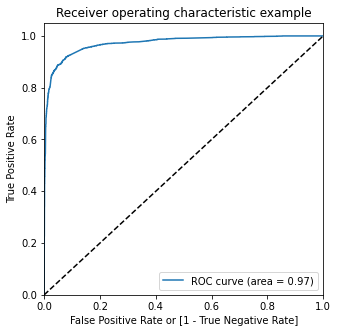

In [129]:
roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

We are getting the ROC curve(area = 0.97) which is indicating a good precdictive model.

## Finding Optimal Cutoff Point
<br>

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value. Let's do that.

In [130]:
#creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.295780,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.029941,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.454277,3274,0,1,1,1,1,1,0,0,0,0,0
3,0,0.001659,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989765,1667,1,1,1,1,1,1,1,1,1,1,1


In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.842030  0.970650  0.763009
0.2   0.2  0.894367  0.951782  0.859093
0.3   0.3  0.920217  0.915723  0.922978
0.4   0.4  0.922132  0.893082  0.939979
0.5   0.5  0.926121  0.874214  0.958011
0.6   0.6  0.925802  0.854507  0.969603
0.7   0.7  0.912079  0.801677  0.979907
0.8   0.8  0.902984  0.767296  0.986347
0.9   0.9  0.885910  0.714465  0.991242


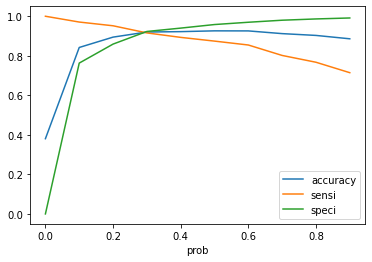

In [132]:
#plotting accuracy, sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [133]:
#from the curve above, 0.3 is the optimum point and can be considered as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()                                                           

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.295780,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.029941,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.454277,3274,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.001659,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989765,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [134]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_prob'].map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.295780,9196,0,30
1,0,0.029941,4696,0,3
2,0,0.454277,3274,1,45
3,0,0.001659,2164,0,0
4,1,0.989765,1667,1,99


In [135]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted'])

0.9202170097335248

In [136]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted'])
confusion2

array([[3583,  299],
       [ 201, 2184]], dtype=int64)

In [137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [138]:
#sensitivity of our logistic regression model

TP / float(TP+FN)

0.9157232704402516

In [139]:
#specificity

TN / float(TN+FP)

0.9229778464708913

In [140]:
#calculating False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.07702215352910871


In [141]:
# Positive predictive value 

print (TP / float(TP+FP))

0.8795811518324608


In [142]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9468816067653277


In [143]:
precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted'])

0.8795811518324608

In [144]:
recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted'])

0.9157232704402516

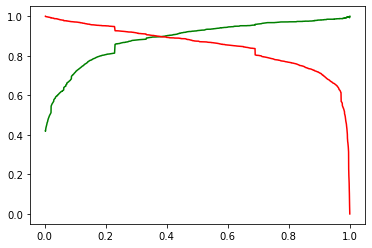

In [145]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [146]:
f1_score(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted'])

0.8972884141331143

### Observation:

So as we can see above the model seems to be performing well. 

The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

- **Accuracy** : 92.02%


- **Sensitivity** : 91.57%


- **Specificity** : 92.29%

<br>

- **Precision** : 87.96%


- **Recall** : 91.57%


- **F1 Score** : 89.73%

## Prediction on Test set
<br>

In [147]:
#scaling test set

num_cols = [col for col in X_test if X_test[col].dtype in ['int64','float64']]

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.301634,0.575687,-0.311318,0.092860,-1.448461,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
984,0.301634,-0.090676,-0.550262,0.356568,-1.448461,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8135,-3.315278,-0.423857,0.812462,-0.170849,-1.448461,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6915,0.301634,0.242505,-0.628665,-0.170849,-1.448461,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2712,0.301634,-0.090676,-0.421456,0.356568,0.690388,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [148]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
984,-0.550262,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
8135,0.812462,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6915,-0.628665,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [149]:
X_test_sm = sm.add_constant(X_test)

In [150]:
#predictions on Test Set

y_test_pred = res.predict(X_test_sm)

y_test_pred[:10]

7681    0.022515
984     0.019512
8135    0.685844
6915    0.003956
2712    0.941252
244     0.002053
4698    0.009619
8287    0.020665
6791    0.980784
8970    0.004426
dtype: float64

In [151]:
#converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
7681,0.022515
984,0.019512
8135,0.685844
6915,0.003956
2712,0.941252


In [152]:
#converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

#putting Cust ID as index

y_test_df['Prospect ID'] = y_test_df.index

In [153]:
#removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.022515
1,0,984,0.019512
2,0,8135,0.685844
3,0,6915,0.003956
4,1,2712,0.941252


In [154]:
#renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.022515
1,0,984,0.019512
2,0,8135,0.685844
3,0,6915,0.003956
4,1,2712,0.941252


In [155]:
#rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.022515,2
1,984,0,0.019512,2
2,8135,0,0.685844,69
3,6915,0,0.003956,0
4,2712,1,0.941252,94


In [156]:
y_pred_final['final_Predicted'] = y_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.022515,2,0
1,984,0,0.019512,2,0
2,8135,0,0.685844,69,1
3,6915,0,0.003956,0,0
4,2712,1,0.941252,94,1


In [157]:
#let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_Predicted'])

0.9255398361876396

In [158]:
#confusion matrix

confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion

array([[1563,  113],
       [  87,  923]], dtype=int64)

In [159]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [160]:
#sensitivity of our logistic regression model is

TP / float(TP+FN)

0.9138613861386139

In [161]:
#specificity

TN / float(TN+FP)

0.9325775656324582

In [162]:
precision_score(y_pred_final['Converted'], y_pred_final['final_Predicted'])

0.890926640926641

In [163]:
recall_score(y_pred_final['Converted'], y_pred_final['final_Predicted'])

0.9138613861386139

### Observation:

Following values are obtained after running the model on Test Data:

- **Accuracy** : 92.55%


- **Sensitivity** : 91.39%


- **Specificity** : 93.26%

<br>

- **Precision** : 89.09%


- **Recall** : 91.37%

## Conclusion:

- Leads Sources (such as Google and Direct Traffic) can bring a lot of business to the company as the Lead conversion is very high compared to other sources.


- Leads who spend more time on the website and were last connected  by SMS are more likely to get converted.


- Unemployed Leads can be focused as they are more likely to select the course as it is going to help them in getting better career opportunities.


- The next group that can be focused on are the Working Professionals as they are likely to choose the course for better job possibilities.


- People who revert to the email are more likely to opt for the courses.


- This model is able to predict 91% of the converted data accurately and this will help the business in increasing the business revenue as the company will be able to increase their conversions by focusing more on candidates that are more likely to get converted.  

Since the Model seems to predict the Conversion Rate effectively we should be able to give the CEO confidence in making wise decisions. 

#### Thank You.